In [1]:
#Import dependencies
from pathlib import Path
import pandas as pd
from zipfile import ZipFile
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
# Zip File Extraction
    # ? Insead of extracting one zip file at a given time, we will extract all the zip files using a for loop
def unzip_files(zip_path, extract_path):
    for zip_path in zip_paths:
        with ZipFile (zip_path, 'r') as zObject:
        # * Extracting all memebters of the zip files into a specific location
            zObject.extractall(
                path = extract_path
            )
# * Usage zip function - Variables:
zip_paths = ["C:\\Users\\Evie Chanthy\\Documents\\Data Analytics Bootcamp\\Week 7 - Project\\Project_1\\crime_analysis\\filtered_1.zip", "C:\\Users\\Evie Chanthy\\Documents\\Data Analytics Bootcamp\\Week 7 - Project\\Project_1\\crime_analysis\\filtered_2.zip"]
extract_path = "C:\\Users\\Evie Chanthy\\Documents\\Data Analytics Bootcamp\\Week 7 - Project\\Project_1\\crime_analysis\\CSVs1"

# * Executing the zip function
unzip_files(zip_paths, extract_path)    

In [3]:
# CSV file path
datasets_1 = "C:\\Users\\Evie Chanthy\\Documents\\Data Analytics Bootcamp\\Week 7 - Project\\Project_1\\crime_analysis\\CSVs1"

# Read into the CSV files
crime_2019 = pd.read_csv("C:\\Users\\Evie Chanthy\\Documents\\Data Analytics Bootcamp\\Week 7 - Project\\Project_1\\crime_analysis\\CSVs1\\filtered_data_1.csv")
crime_2020 = pd.read_csv("C:\\Users\\Evie Chanthy\\Documents\\Data Analytics Bootcamp\\Week 7 - Project\\Project_1\\crime_analysis\\CSVs1\\filtered_data_2.csv")
crime_2021 = pd.read_csv("C:\\Users\\Evie Chanthy\\Documents\\Data Analytics Bootcamp\\Week 7 - Project\\Project_1\\crime_analysis\\CSVs1\\filtered_data_3.csv")
crime_2022 = pd.read_csv("C:\\Users\\Evie Chanthy\\Documents\\Data Analytics Bootcamp\\Week 7 - Project\\Project_1\\crime_analysis\\CSVs1\\filtered_data_4.csv")
crime_2023 = pd.read_csv("C:\\Users\\Evie Chanthy\\Documents\\Data Analytics Bootcamp\\Week 7 - Project\\Project_1\\crime_analysis\\CSVs1\\filtered_data_5.csv")

# Concatenate the CSVs into a datafram
crime_df = pd.concat([crime_2019, crime_2020])
crime_df = pd.concat([crime_df, crime_2021])
crime_df = pd.concat([crime_df, crime_2022])
crime_df = pd.concat([crime_df, crime_2023])

C:\Users\Evie Chanthy\AppData\Local\Temp\ipykernel_13088\2939267751.py:5: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  crime_2019 = pd.read_csv("C:\\Users\\Evie Chanthy\\Documents\\Data Analytics Bootcamp\\Week 7 - Project\\Project_1\\crime_analysis\\CSVs1\\filtered_data_1.csv")
C:\Users\Evie Chanthy\AppData\Local\Temp\ipykernel_13088\2939267751.py:6: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  crime_2020 = pd.read_csv("C:\\Users\\Evie Chanthy\\Documents\\Data Analytics Bootcamp\\Week 7 - Project\\Project_1\\crime_analysis\\CSVs1\\filtered_data_2.csv")
C:\Users\Evie Chanthy\AppData\Local\Temp\ipykernel_13088\2939267751.py:7: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  crime_2021 = pd.read_csv("C:\\Users\\Evie Chanthy\\Documents\\Data Analytics Bootcamp\\Week 7 - Project\\Project_1\\crime_analysis\\CSVs1\\filtered

In [4]:
# convert the date columns to date format
crime_df["Updated On"] = pd.to_datetime(
    crime_df["Updated On"],
    errors = "coerce",
    infer_datetime_format=True,
    format ="%T"
)
crime_df["Date"] = pd.to_datetime(
    crime_df["Date"],
    errors = "coerce",
    infer_datetime_format=True,
)

# Remove some data that is outside Chicago
crime_df = crime_df.loc[crime_df['Longitude'] > -90, :]
crime_df

,Unnamed: 0,ID,Case Number,Date,Year,Updated On,Block,Primary Type,Location Description,Arrest,Domestic,Police District,Ward,Community Area,Latitude,Longitude
0,0,11553168,JC100745,2019-01-01 00:00:00,2019,2019-01-10 15:16:50,008XX N MICHIGAN AVE,THEFT,RESTAURANT,False,False,18,2.0,Near North Side,41.898770,-87.624115
1,36,12631707,JF160360,2019-01-01 00:00:00,2019,2022-10-25 16:54:34,111XX S AVENUE O,OFFENSE INVOLVING CHILDREN,RESIDENCE,False,True,4,10.0,East Side,41.692930,-87.540110
2,37,11552667,JC100123,2019-01-01 00:00:00,2019,2019-01-10 15:16:50,004XX N STATE ST,THEFT,RESTAURANT,False,False,18,42.0,Near North Side,41.889454,-87.628000
3,38,11552674,JC100085,2019-01-01 00:00:00,2019,2019-01-10 15:16:50,092XX S NORMAL AVE,MOTOR VEHICLE THEFT,STREET,False,False,22,21.0,Washington Heights,41.726566,-87.636060
4,39,11552709,JC100020,2019-01-01 00:00:00,2019,2019-01-10 15:16:50,044XX S WASHTENAW AVE,BATTERY,APARTMENT,False,True,9,15.0,Brighton Park,41.812780,-87.691895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124413,807138,13131643,JG329079,2023-07-02 23:45:00,2023,2023-07-09 16:51:53,117XX S MICHIGAN AVE,OTHER OFFENSE,COMMERCIAL / BUSINESS OFFICE,True,False,5,9.0,West Pullman,41.681360,-87.620620
124414,807139,13127402,JG325350,2023-07-02 23:46:00,2023,2023-07-09 16:51:53,057XX W 64TH PL,BATTERY,APARTMENT,False,True,8,13.0,Clearing,41.775270,-87.764900
124415,807140,13128068,JG326201,2023-07-02 23:55:00,2023,2023-07-09 16:51:53,050XX W CONGRESS PKWY,OTHER OFFENSE,APARTMENT,False,False,15,29.0,Austin,41.873993,-87.751274
124416,807141,13127380,JG325336,2023-07-02 23:56:00,2023,2023-07-09 16:51:53,0000X E ROOSEVELT RD,WEAPONS VIOLATION,STREET,True,False,1,4.0,(The) Loop[11],41.867420,-87.626980


In [5]:
# create a data frame for the pre-COVID period. We have selected the start of COVID as 24 Jan 2020, which is 
# the the first day someone in the U.S. state of Illinois tested positive for COVID
pre_covid_df=crime_df.loc[(crime_df["Date"] < "2020-01-24")]

# create a data frame for the COVID period. We have selected the period 24 Jan 2020 to 28 Feb 2022, as 28 Feb 2022 is the day
# restrictions were lifted (i.e mask and vaccine requirements were lifted on this day)
covid_df = crime_df.loc[(crime_df["Date"] >= "2020-01-24")\
                       & (crime_df["Date"] < "2022-02-28")]

# create a data frame for the post-COVID period. We have selected dates after and including 28 Feb 2022
post_covid_df = crime_df.loc[(crime_df["Date"] >= "2022-02-28")]


Source: [Covid start](https://news.wttw.com/2020/01/24/1st-case-coronavirus-confirmed-chicago)
Source: [Covid end](https://www.chicago.gov/city/en/depts/cdph/provdrs/health_protection_and_response/news/2022/february/city-to-remove-mask-and-vaccine-requirements-for-certain-public-.html)

# How has Covid impacted the number of domestic related crimes?

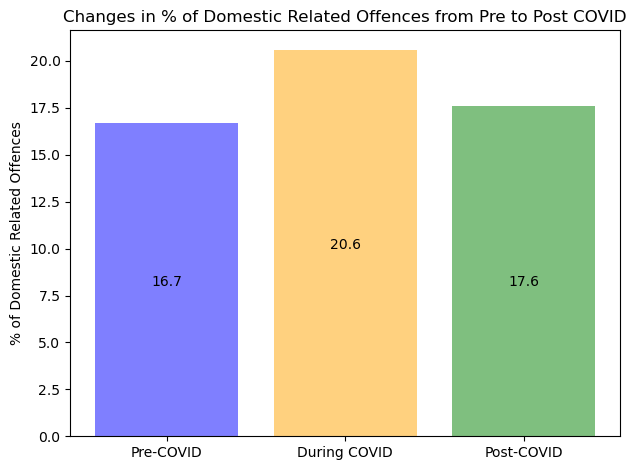

In [6]:
# How has COVID impacted the number of domestic-related crimes in Chicago?
# Count the number of instances there has been domestic related offences in all three dataframes
pre_covid_domestic_count = len(pre_covid_df.loc[pre_covid_df["Domestic"] == True,:])
covid_domestic_count = len(covid_df.loc[covid_df["Domestic"] == True,:])
post_covid_domestic_count = len(post_covid_df.loc[post_covid_df["Domestic"] == True,:])


# Calculate the % of crime offences during each period that relate to domestic related offences
pre_covid_domestic_percent = round((pre_covid_domestic_count/len(pre_covid_df))*100,1)
covid_domestic_percent = round((covid_domestic_count/len(covid_df))*100,1)
post_covid_domestic_percent = round((post_covid_domestic_count/len(post_covid_df))*100,1)

# Set x axis and tick locations using the data series created above
x_axis = ["Pre-COVID", "During COVID", "Post-COVID"]
y_axis = [pre_covid_domestic_percent,covid_domestic_percent, post_covid_domestic_percent]

#Create a Pyplot bar plot based on the x and y axis defined above
plt.bar(x_axis, y_axis, align='center', color = ["blue", "orange", "green"], alpha=0.5)

# set a label for x and y axis
plt.ylabel("% of Domestic Related Offences") 
plt.xticks(rotation="horizontal")
plt.title("Changes in % of Domestic Related Offences from Pre to Post COVID")

# Add the values of each bar to the graph
def addlabels(x_axis,y_axis):
    for i in range(len(x_axis)):
        plt.text(i, y_axis[i]//2,y_axis[i], ha = 'center')
 
addlabels(x_axis,y_axis)
plt.tight_layout()

# save the graph as an image and display the plot
plt.savefig("Images/Changes_in_Domestic.png")
plt.show()


# What is the location for a majority of domestic related offences?

In [13]:
# Create dataframes that where only the 'Domestic' column is True for each period
pre_covid_domestic_loc = pre_covid_df.loc[pre_covid_df["Domestic"] == True,:]
covid_domestic_loc = covid_df.loc[covid_df["Domestic"] == True,:]
post_covid_domestic_loc = post_covid_df.loc[post_covid_df["Domestic"] == True,:]

# Count the types of locations where domestic related offences have occurred for each period, and calculate the % of locations
# for each period
pre_covid_domestic_loc = pre_covid_domestic_loc.groupby("Location Description")
pre_covid_domestic_loc = pre_covid_domestic_loc["Location Description"].count()
pre_covid_domestic_loc = pd.DataFrame(pre_covid_domestic_loc)
pre_covid_domestic_loc = pre_covid_domestic_loc.rename(columns={"Location Description": "Pre-Covid Dom Loc"})
pre_covid_domestic_loc_sum = pre_covid_domestic_loc["Pre-Covid Dom Loc"].sum()
pre_covid_domestic_loc["Pre-Covid Dom Loc %"] = (pre_covid_domestic_loc["Pre-Covid Dom Loc"]/pre_covid_domestic_loc_sum)*100

covid_domestic_loc = covid_domestic_loc.groupby("Location Description")
covid_domestic_loc = covid_domestic_loc["Location Description"].count()
covid_domestic_loc = pd.DataFrame(covid_domestic_loc)
covid_domestic_loc = covid_domestic_loc.rename(columns={"Location Description": "Covid Dom Loc"})
covid_domestic_loc_sum = covid_domestic_loc["Covid Dom Loc"].sum()
covid_domestic_loc["Covid Dom Loc %"] = (covid_domestic_loc["Covid Dom Loc"]/covid_domestic_loc_sum)*100

post_covid_domestic_loc = post_covid_domestic_loc.groupby("Location Description")
post_covid_domestic_loc = post_covid_domestic_loc["Location Description"].count()
post_covid_domestic_loc = pd.DataFrame(post_covid_domestic_loc)
post_covid_domestic_loc = post_covid_domestic_loc.rename(columns={"Location Description": "Post-Covid Dom Loc"})
post_covid_domestic_loc_sum = post_covid_domestic_loc["Post-Covid Dom Loc"].sum()
post_covid_domestic_loc["Post-Covid Dom Loc %"] = (post_covid_domestic_loc["Post-Covid Dom Loc"]/post_covid_domestic_loc_sum)*100

# Merge the dataframes
combined_dom_loc = pd.merge(pre_covid_domestic_loc, covid_domestic_loc, on="Location Description", how="outer")
combined_dom_loc = pd.merge(combined_dom_loc, post_covid_domestic_loc, on="Location Description", how="outer")
combined_dom_loc = combined_dom_loc.dropna(how='any')

# Sort the dataframe by descending order and keep the top four locations for domestic-related offences
combined_dom_loc = combined_dom_loc.sort_values(["Pre-Covid Dom Loc %","Covid Dom Loc %","Post-Covid Dom Loc %"], ascending=False)
combined_dom_loc = combined_dom_loc[["Pre-Covid Dom Loc %","Covid Dom Loc %","Post-Covid Dom Loc %"]]
top_combined_dom_loc = combined_dom_loc.head(4)


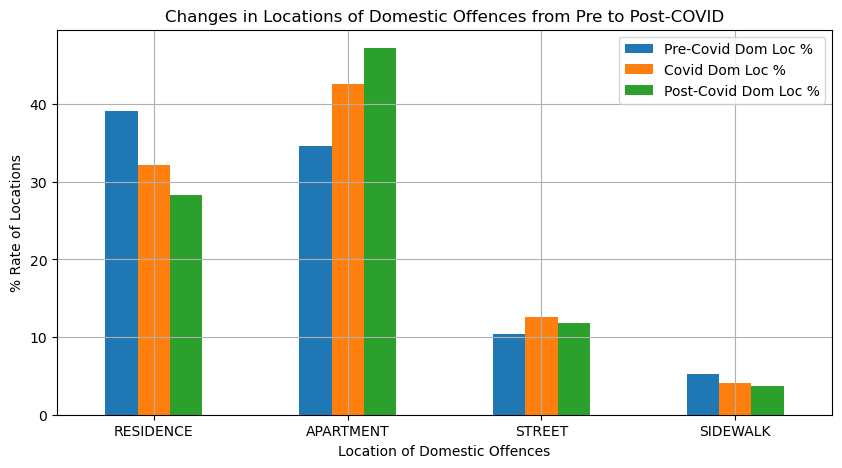

In [14]:
#Plot the top crimes dataframe into a bar chart
top_combined_dom_loc.plot(kind="bar", figsize=(10,5), grid=True, rot=0)

# Format the chart and add labels
plt.legend(loc="best") 
plt.title("Changes in Locations of Domestic Offences from Pre to Post-COVID") 
plt.xlabel("Location of Domestic Offences") 
plt.ylabel("% Rate of Locations")

# save the graph as an image and display the plot
plt.savefig("Images/Domestic_Offence_Locations.png")
plt.show()

# Observations - Domestic Offences
The first chart shows that there was a higher percentage of domestic related offences during the Covid period, as compared to the pre and post Covid periods. This is expected, and can be linked to the stay at home and social distancing provisions imposed by the State, which commenced on 21 March 2020 and was extended for 2 months. 

When we take a more detailed look into the most prolific location of these domestic offences for each of the 3 periods, we can see that most of the offences occur at either a residence location or apartment location i.e. private dwellings, and less so in public areas such as streets and sidewalks. One observation noted is that the rate of domestic offences for residence locations has decreased from pre-Covid to post-Covid, while an opposite trend can be observed for apartment locations. This can be attributable to Covid's detrimental impact to housing affordability in Chicago driven by job losses. Further, we can observe an increasing trend in domestic offences in apartment locations from pre to post Covid. The increase from post-Covid may be linked to victims feeling more comfortable in seeking help after the easing of government imposed restrictions following the pandemic. In addition, the stay at home provisions may have caused tensions to build during the Covid period, which may also explain the increase in domestic offences at apartments post the pandemic. 


Source: [Covid impacts on Domestic Cases](https://wgntv.com/news/cover-story/shadow-pandemic-of-gender-based-violence-spurs-action-in-chicago/)

Source: [Chicago lockdowns 1](https://www.cbsnews.com/chicago/news/three-years-since-covid-19-worldwide-pandemic/)

Source: [Chicago lockdowns 2](https://www.illinois.gov/news/press-release.21288.html#:~:text=The%20order%20takes%20effect%205,of%20more%20than%2010%20people.)

Source: [DV during lockdowns](https://www.themarshallproject.org/2020/04/22/is-domestic-violence-rising-during-the-coronavirus-shutdown-here-s-what-the-data-shows)

Source: [Housing Affordability](https://chicago.suntimes.com/2020/4/27/21238379/covid-19-affordable-housing-chicago-rent-marisa-novara-op-ed)

Source: [DV during Covid](https://www.themarshallproject.org/2020/04/22/is-domestic-violence-rising-during-the-coronavirus-shutdown-here-s-what-the-data-shows)


# Did Covid impact how prolific each type of crime is?

In [15]:
# Group the dataframe by "Primary Type" and count how many times each type appears in the dataframe
pre_covid_types = pre_covid_df.groupby("Primary Type")
pre_covid_types = pre_covid_types["Primary Type"].count()
pre_covid_types = pd.DataFrame(pre_covid_types)

# Rename the Count column
pre_covid_types = pre_covid_types.rename(columns={"Primary Type": "Pre-Covid Count"})

# Calculate the percentage rate of each crime type for the Covid period and add it into a new column in the dataframe
pre_covid_sum = pre_covid_types["Pre-Covid Count"].sum()
pre_covid_types["Pre-Covid %"]= (pre_covid_types["Pre-Covid Count"]/pre_covid_sum)*100 

In [16]:
# Group the dataframe by "Primary Type" and count how many times each type appears in the dataframe
covid_types = covid_df.groupby("Primary Type")
covid_types = covid_types["Primary Type"].count()
covid_types = pd.DataFrame(covid_types)

# Rename the Count column
covid_types = covid_types.rename(columns={"Primary Type": "Covid Count"})

# Calculate the percentage rate of each crime type for the Covid period and add it into a new column in the dataframe
covid_sum = covid_types["Covid Count"].sum()
covid_types["Covid %"]= (covid_types["Covid Count"]/covid_sum)*100 

In [17]:
# Group the dataframe by "Primary Type" and count how many times each type appears in the dataframe
post_covid_types = post_covid_df.groupby("Primary Type")
post_covid_types = post_covid_types["Primary Type"].count()
post_covid_types = pd.DataFrame(post_covid_types)

# Rename the Count column
post_covid_types = post_covid_types.rename(columns={"Primary Type": "Post-Covid Count"})

# Calculate the percentage rate of each crime type for the post-Covid period and add it into a new column in the dataframe
post_covid_sum = post_covid_types["Post-Covid Count"].sum()
post_covid_types["Post-Covid %"]= (post_covid_types["Post-Covid Count"]/post_covid_sum)*100 

In [18]:
# Merge the dataframes based on the Primary Type column
combined_types = pd.merge(pre_covid_types, covid_types, on="Primary Type", how="outer")
combined_types = pd.merge(combined_types, post_covid_types, on="Primary Type", how="outer")
combined_types.head()

,Pre-Covid Count,Pre-Covid %,Covid Count,Covid %,Post-Covid Count,Post-Covid %
Primary Type,,,,,,
ARSON,397.0,0.145101,1141,0.267467,613.0,0.186997
ASSAULT,21734.0,7.943626,39975,9.370737,28888.0,8.812341
BATTERY,52152.0,19.061195,84548,19.819313,56479.0,17.229030
BURGLARY,10179.0,3.720354,15837,3.712429,10049.0,3.065467
CONCEALED CARRY LICENSE VIOLATION,228.0,0.083332,336,0.078763,244.0,0.074433


In [19]:
# Sort the combined dataframe by descending order so that we can obtain the top 10 prolific crime types
combined_types = combined_types.sort_values(["Pre-Covid %","Covid %","Post-Covid %"], ascending=False)

In [20]:
# Save the top 10 crime types in a new data frame and keep only the % columns
top_crime_types = combined_types.head(10)
top_crime_types = top_crime_types[["Pre-Covid %","Covid %","Post-Covid %"]]

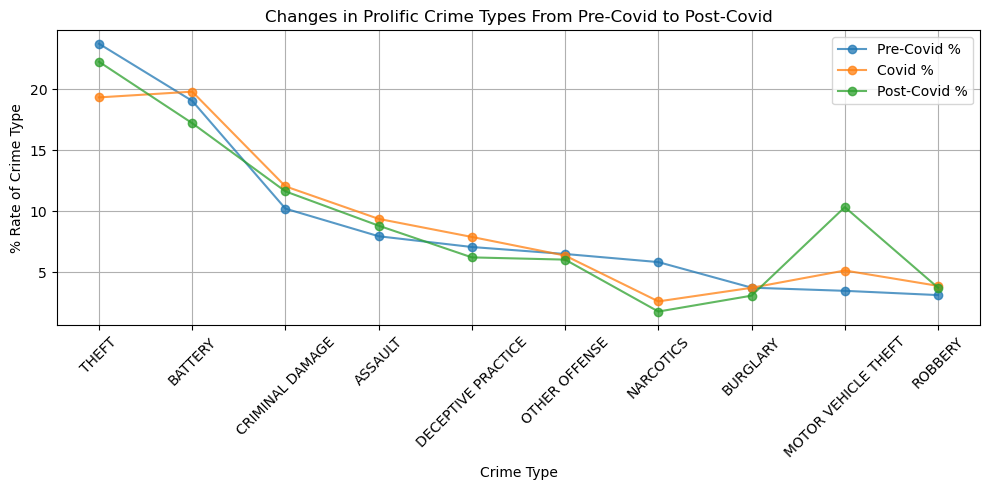

In [16]:
# Plot the top crimes dataframe into a line graph
top_crime_types.plot( marker='o',figsize=(10,5), alpha = 0.75, rot=45, grid=True)

# Format the chart and add labels
plt.legend(loc="best") 
plt.title("Changes in Prolific Crime Types From Pre-Covid to Post-Covid") 
plt.xlabel("Crime Type") 
plt.ylabel("% Rate of Crime Type")
plt.tight_layout()

# Add x-ticks to the chart
crimes = list(top_crime_types.index.values) 
x_axis = np.arange(len(crimes))
tick_locations = [value for value in x_axis] 
plt.xticks(tick_locations, ['THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'ASSAULT', 'DECEPTIVE PRACTICE', 'OTHER OFFENSE',\
                            'NARCOTICS', 'BURGLARY', 'MOTOR VEHICLE THEFT', 'ROBBERY']) 

# save the graph as an image and display the plot
plt.savefig("Images/Changes_in_Crime_Types.png")
plt.show()

# OBSERVATIONS - Prolific Crimes
We can observe that the percentage rate of primary crime types throughout the 3 periods is consistent for most crime types, and Covid has not had a significant impact on how prolific a type of crime is. 

However, for narcotic related offences, it can be seen that there was a higher percentage of narcotic crimes for the pre-Covid period, in comparison to the during and post-Covid period. This can be linked to the legalisation of cannabis in Illinois, where commencing January 1, 2020 and during the pre-Covid era, adults over the age of 21 became legally able to possess, consume and purchase cannabis. 

Source: [Cannabis legalisation](https://www.chicago.gov/city/en/sites/cannabis-information-center/home/social-consumption.html#:~:text=Pursuant%20to%20state%20law%2C%20adults,discretion%20of%20the%20property%20owner.)

We can also observe a spike in motor vehicle theft for the post-Covid period. This can be attributable to the virus' impact on the supply of new cars in the motor vehicle industry due to the Covid lockdowns. This caused consumer demand for new cars to surpass supply and hence creating a shortage in the supply of new cars and a spike in prices. This has also had a flow on effect on the second hand market for cars, where the supply of used vehicles cannot keep up with the demand, causing prices to increase even during the post-Covid period. As such higher car prices has made both new and second-hand cars less affordable, leading to an increase in motor vehicle theft for the post-Covid period.

Source: [New cars](https://www.chicagotribune.com/coronavirus/ct-coronavirus-chicago-auto-industry-inventory-new-cars-20201002-hbxvy3qf65espn5q4zxaevs754-story.html)

Source: [Used cars](https://www.chicagotribune.com/business/ct-biz-used-car-prices-20230330-chd5cfaq2jcqzk2hnqzl4fkzca-story.html)